In [1]:
import random 
random.seed(3456)
from v2.ddqn_agent import DDQNAgent

Using TensorFlow backend.


In [2]:
num_coins_per_order = 100 #0 means buy/sell all per order
recent_k = 150

# Always BUY

In [3]:
dummy = DDQNAgent(recent_k = 150, num_coins_per_order = num_coins_per_order, coin_name = "debug_always_buy",
                     external_states = ["current_price"],
                     internal_states = ["is_holding_coin"], epsilon_min = 0.01, verbose=False)

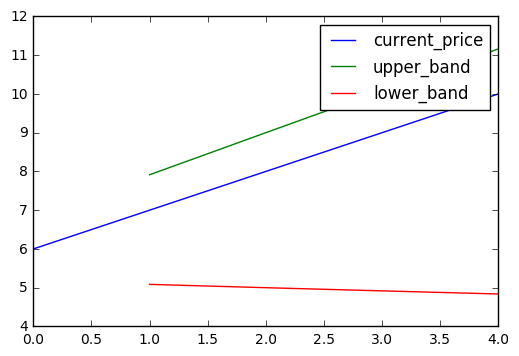

In [4]:
dummy.env.plot(states_to_plot=["current_price", "upper_band", "lower_band"])

In [5]:
dummy.train(num_episodes=300)

episode: 1/300, returns: 3.46534653465, epsilon: 1.0
episode: 2/300, returns: 3.46534653465, epsilon: 1.0
episode: 3/300, returns: -1.9801980198, epsilon: 1.0
episode: 4/300, returns: 17.6237623762, epsilon: 1.0
episode: 5/300, returns: 23.3152347493, epsilon: 1.0
episode: 6/300, returns: -1.9801980198, epsilon: 1.0
episode: 7/300, returns: 18.8118811881, epsilon: 1.0
episode: 8/300, returns: 50.7996953542, epsilon: 0.99
episode: 9/300, returns: 3.17873892652, epsilon: 0.99
episode: 10/300, returns: 12.0226308345, epsilon: 0.99
episode: 11/300, returns: 22.5247524752, epsilon: 0.98
episode: 12/300, returns: 26.0254596888, epsilon: 0.98
episode: 13/300, returns: 10.2722772277, epsilon: 0.97
episode: 14/300, returns: 33.026874116, epsilon: 0.97
episode: 15/300, returns: 0.0, epsilon: 0.96
episode: 16/300, returns: 22.5247524752, epsilon: 0.96
episode: 17/300, returns: 30.6930693069, epsilon: 0.95
episode: 18/300, returns: 23.5901851055, epsilon: 0.95
episode: 19/300, returns: 9.551543389

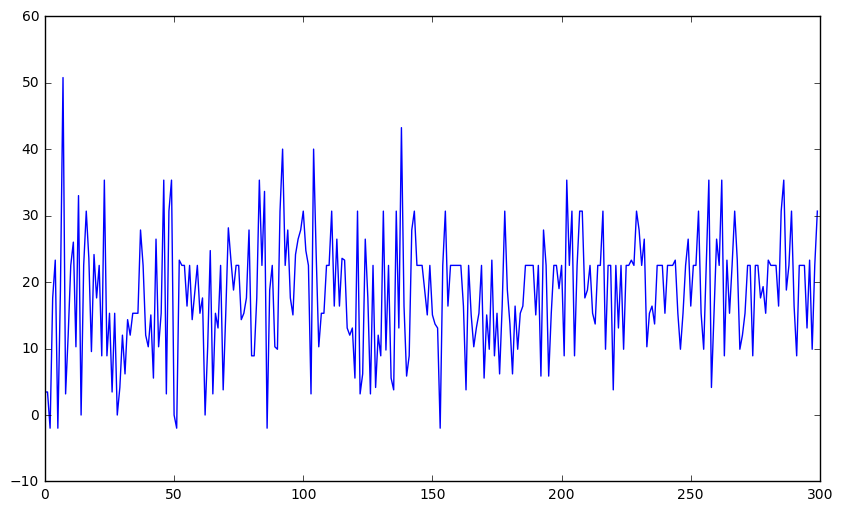

In [6]:
dummy.plot_cum_returns()

In [7]:
dummy.test(epsilon=0.23)

Action.BUY
Action.HOLD
Action.BUY
Action.SELL
Action.BUY
18.4405940594


In [15]:
dummy.print_my_memory()

[6.0, 0]_Action.BUY_983.0_[7.0, 1]_False
57


[6.0, 0]_Action.BUY_984.0_[6.0, 1]_False
194


[6.0, 0]_Action.HOLD_0.0_[6.0, 0]_False
106


[6.0, 0]_Action.HOLD_0.0_[7.0, 0]_False
49


[6.0, 1]_Action.BUY_1280.0_[7.0, 1]_False
139


[6.0, 1]_Action.HOLD_297.0_[7.0, 1]_False
33


[6.0, 1]_Action.SELL_87.0_[7.0, 0]_False
22


[7.0, 0]_Action.BUY_982.0_[8.0, 1]_False
44


[7.0, 0]_Action.HOLD_0.0_[8.0, 0]_False
27


[7.0, 1]_Action.BUY_1180.0_[8.0, 1]_False
56


[7.0, 1]_Action.BUY_1378.0_[8.0, 1]_False
102


[7.0, 1]_Action.HOLD_198.0_[8.0, 1]_False
21


[7.0, 1]_Action.HOLD_396.0_[8.0, 1]_False
19


[7.0, 1]_Action.SELL_186.0_[8.0, 0]_False
5


[7.0, 1]_Action.SELL_85.0_[8.0, 0]_False
8


[7.0, 1]_Action.SELL_85.0_[8.0, 1]_False
18


[8.0, 0]_Action.BUY_981.0_[9.0, 1]_False
22


[8.0, 0]_Action.HOLD_0.0_[9.0, 0]_False
18


[8.0, 1]_Action.BUY_1080.0_[9.0, 1]_False
50


[8.0, 1]_Action.BUY_1179.0_[9.0, 1]_False
53


[8.0, 1]_Action.BUY_1278.0_[9.0, 1]_False
79


[8.0, 1]_Action.HOLD_198.0

In [16]:
print dummy.model.predict([6.0, 0])

[[  90548.578125    102761.15625      25394.82617188]]


In [17]:
print dummy.model.predict([6.5, 0])

[[  96838.3203125   109899.2265625    27158.81445312]]


In [18]:
print dummy.model.predict([7.0, 0])

[[ 103128.0625     117037.2578125   28922.8046875]]


In [19]:
print dummy.model.predict([7.0, 1])

[[ 111123.0625     126110.5703125   31165.0390625]]


In [20]:
print dummy.model.predict([8.0, 0])

[[ 115707.546875  131313.390625   32450.78125 ]]


## Thoughts
* is the model really learning something useful here?
* why is it learning such astronomical values? did we do something wrong?
    * so the model should predict the final state correctly right???? why is the 190, 199...etc. wtf

In [21]:
import numpy as np 

def __test_replay(self, batch_size):
        minibatch = random.sample(self.memory, self.batch_size)
        
        for state, action, reward, next_state, isDone in minibatch:
            target = self.model.predict(state)
            if isDone:
                target[0][action.value] = reward
                print "yep!"
                print state, action, reward, next_state, isDone
            else:
                a = self.model.predict(next_state)[0]
                t = self.target_model.predict(next_state)[0]
                target[0][action.value] = reward + self.gamma * t[np.argmax(a)]
            print "state", state, "target", target
                ## -0.60 + gamma * -0.50
            self.model.train(state, target)
        
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

In [22]:
__test_replay(dummy, 30)

yep!
[9.0, 1] Action.SELL 81.0 [10.0, 1] True
state [9.0, 1] target [[  1.36282031e+05   1.54662797e+05   8.10000000e+01]]
yep!
[9.0, 0] Action.BUY 980.0 [10.0, 1] True
state [9.0, 0] target [[ 128310.0625      980.        35969.09375]]
state [8.0, 0] target [[ 115742.21875     147910.65625      32432.85351562]]
yep!
[9.0, 1] Action.BUY 980.0 [10.0, 1] True
state [9.0, 1] target [[ 136341.53125        980.           38191.20703125]]
state [6.0, 1] target [[  98594.7421875   121085.0390625    27608.75976562]]
state [6.0, 0] target [[  97623.1015625   102788.8125       25364.55078125]]
state [8.0, 1] target [[ 147127.65625  140432.125     34646.0625 ]]
state [6.0, 0] target [[  97623.1015625   102807.109375     25358.64648438]]
state [7.0, 1] target [[ 111270.9375      134547.359375     31118.05078125]]
state [7.0, 1] target [[ 111304.03125     134745.359375     31117.49609375]]
state [8.0, 1] target [[ 123941.7421875  148108.65625     34640.8046875]]
state [6.0, 0] target [[  90754.2734

# Never BUY

In [3]:
dummy_hold = DDQNAgent(recent_k = 150, num_coins_per_order = num_coins_per_order, coin_name = "debug_never_buy",
                     external_states = ["current_price", "rolling_mean"],
                     internal_states = ["is_holding_coin"], epsilon_min = 0.01, verbose=False)

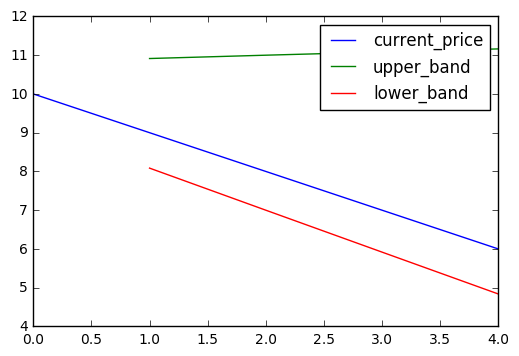

In [4]:
dummy_hold.env.plot(states_to_plot=["current_price", "upper_band", "lower_band"])

In [5]:
dummy_hold.train(num_episodes=300)

episode: 1/300, returns: -8.98161244696, epsilon: 1.0
episode: 2/300, returns: -8.98161244696, epsilon: 1.0
episode: 3/300, returns: -1.9801980198, epsilon: 1.0
episode: 4/300, returns: -23.2888506242, epsilon: 1.0
episode: 5/300, returns: -25.7425742574, epsilon: 1.0
episode: 6/300, returns: -1.9801980198, epsilon: 1.0
episode: 7/300, returns: -24.1137016927, epsilon: 1.0
episode: 8/300, returns: -38.0927566441, epsilon: 0.99
episode: 9/300, returns: -15.9830268741, epsilon: 0.99
episode: 10/300, returns: -12.8712871287, epsilon: 0.99
episode: 11/300, returns: -19.801980198, epsilon: 0.98
episode: 12/300, returns: -23.7623762376, epsilon: 0.98
episode: 13/300, returns: -14.2326732673, epsilon: 0.97
episode: 14/300, returns: -29.2079207921, epsilon: 0.97
episode: 15/300, returns: 0.0, epsilon: 0.96
episode: 16/300, returns: -26.4851485149, epsilon: 0.96
episode: 17/300, returns: -30.8095515434, epsilon: 0.95
episode: 18/300, returns: -25.504950495, epsilon: 0.95
episode: 19/300, return

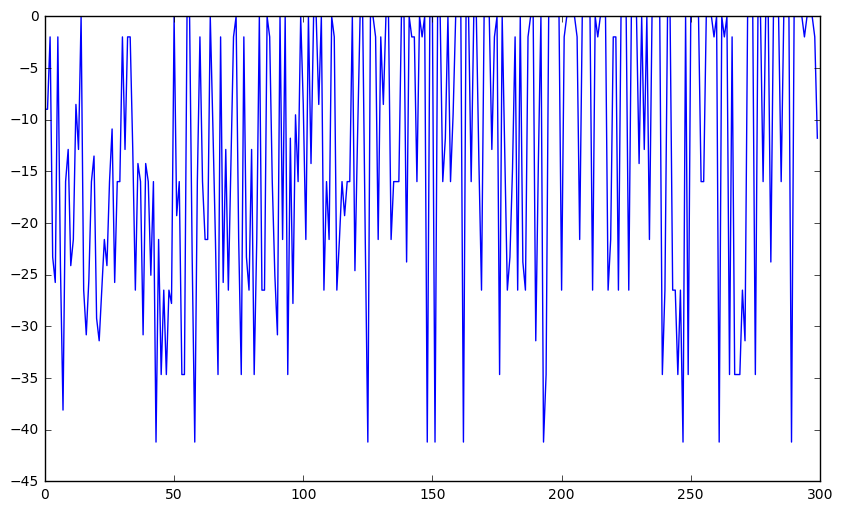

In [6]:
dummy_hold.plot_cum_returns()

In [7]:
dummy_hold.test(epsilon=0.23)

Action.HOLD
Action.BUY
Action.HOLD
Action.HOLD
Action.HOLD
-34.6534653465


# BUY & SELL

In [3]:
dummy_both = DDQNAgent(recent_k = 150, num_coins_per_order = num_coins_per_order, coin_name = "debug_buy_sell_hold",
                     external_states = ["current_price", "rolling_mean"],
                     internal_states = [], epsilon_min = 0.01, verbose=False)

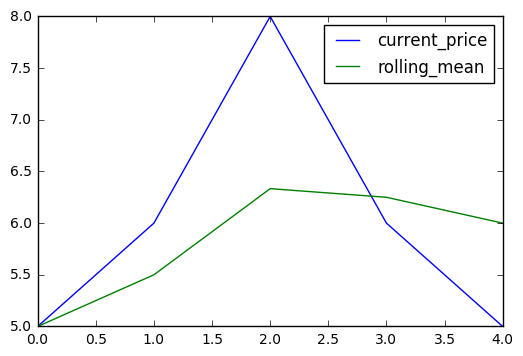

In [4]:
dummy_both.env.plot(states_to_plot=["current_price", "rolling_mean"])

In [5]:
dummy_both.train(num_episodes=500)

episode: 1/500, returns: -17.0601675552, epsilon: 1.0
episode: 2/500, returns: -17.0601675552, epsilon: 1.0
episode: 3/500, returns: -1.9801980198, epsilon: 1.0
episode: 4/500, returns: -22.6159458051, epsilon: 1.0
episode: 5/500, returns: -14.2326732673, epsilon: 1.0
episode: 6/500, returns: -1.9801980198, epsilon: 1.0
episode: 7/500, returns: -18.3168316832, epsilon: 1.0
episode: 8/500, returns: -10.8910891089, epsilon: 0.99
episode: 9/500, returns: -18.3168316832, epsilon: 0.99
episode: 10/500, returns: 30.6930693069, epsilon: 0.99
episode: 11/500, returns: -18.3168316832, epsilon: 0.98
episode: 12/500, returns: 56.8316831683, epsilon: 0.98
episode: 13/500, returns: -26.4851485149, epsilon: 0.97
episode: 14/500, returns: -18.3168316832, epsilon: 0.97
episode: 15/500, returns: 0.0, epsilon: 0.96
episode: 16/500, returns: -18.3168316832, epsilon: 0.96
episode: 17/500, returns: -29.9858557284, epsilon: 0.95
episode: 18/500, returns: -22.6159458051, epsilon: 0.95
episode: 19/500, return

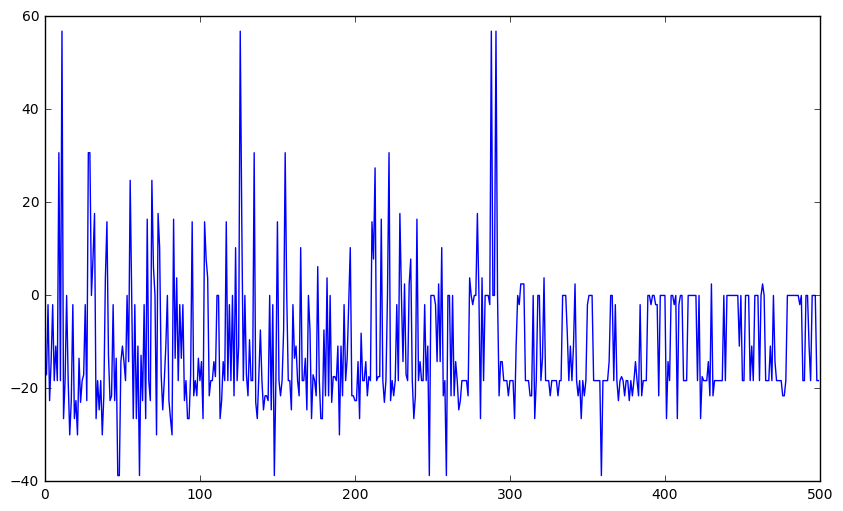

In [6]:
dummy_both.plot_cum_returns()

In [7]:
dummy_both.test(epsilon=0.016)

Action.BUY
Action.BUY
Action.BUY
Action.BUY
Action.BUY
-18.3168316832


In [18]:
import numpy as np 

def __test_replay(self, batch_size):
        minibatch = random.sample(self.memory, self.batch_size)
        
        for state, action, reward, next_state, isDone in minibatch:
            target = self.model.predict(state)
            if isDone:
                target[0][action.value] = reward
                print "yep!"
                print state, action, reward, next_state, isDone
            else:
                a = self.model.predict(next_state)[0]
                t = self.target_model.predict(next_state)[0]
                target[0][action.value] = reward + self.gamma * t[np.argmax(a)]
            print "state", state, "target", target
                ## -0.60 + gamma * -0.50
            self.model.train(state, target)
        
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

In [24]:
__test_replay(dummy_both, 30)

state [6.0, 5.5] target [[  8.77749538 -90.92821503   7.64539528]]
state [6.0, 5.5] target [[-174.39082336  -90.98170471    7.65034676]]
state [5.0, 5.0] target [[  6.40616369 -13.33929157   6.81099844]]
state [8.0, 6.333333333333333] target [[   8.68505859 -110.56342316  -12.14958382]]
yep!
[6.0, 6.25] Action.HOLD -19.80198 [5.0, 6.0] True
state [6.0, 6.25] target [[-19.80197906 -96.04714203   8.04329967]]
state [5.0, 5.0] target [[  6.46268845 -80.6962738    6.775002  ]]
state [5.0, 5.0] target [[   6.38113976  -80.69271851  183.50074768]]
yep!
[6.0, 6.25] Action.HOLD -387.375999 [5.0, 6.0] True
state [6.0, 6.25] target [[-387.37600708  -96.03631592    8.00399399]]
yep!
[6.0, 6.25] Action.HOLD 0.0 [5.0, 6.0] True
state [6.0, 6.25] target [[  0.         -96.03233337   8.00472927]]
state [6.0, 5.5] target [[-174.39082336  -91.00598907    7.59805107]]
yep!
[6.0, 6.25] Action.HOLD 0.0 [5.0, 6.0] True
state [6.0, 6.25] target [[  0.         -96.01828766   8.00539589]]
yep!
[6.0, 6.25] Act